# Step 1: Introduction

## 1.1 Dataset Description

The dataset used in this analysis is from the Aspiring Mind Employment Outcome 2015 (AMEO) study, focusing on engineering graduates. It contains various independent variables related to candidates' academic performance, skills, demographic features, and employment outcomes. The dataset comprises approximately 40 independent variables and 4000 data points. Below is a summary table describing the variables included in the dataset:

| Variable Name       | Type         | Description                                     |
|---------------------|--------------|-------------------------------------------------|
| ID                  | UID          | A unique ID to identify a candidate             |
| Salary              | Continuous   | Annual CTC offered to the candidate (in INR)    |
| DOJ                 | Date         | Date of joining the company                      |
| DOL                 | Date         | Date of leaving the company                     |
| Designation         | Categorical  | Designation offered in the job                  |
| JobCity             | Categorical  | Location of the job (city)                      |
| Gender              | Categorical  | Candidate’s gender                              |
| DOB                 | Date         | Date of birth of the candidate                  |
| 10percentage        | Continuous   | Overall marks obtained in grade 10 examinations |
| ...                 | ...          | ...                                             |




## 1.2 Objective of the Project

The objective of this project is to perform exploratory data analysis (EDA) on the dataset to gain insights into the characteristics, distributions, and relationships within the data. Specifically, we aim to:
- Analyze the distribution of the target variable (Salary) and other relevant variables.
- Investigate relationships between different variables, including numerical and categorical columns.
- Test claims made in a Times of India article regarding earnings based on specialization and job roles.
- Explore the relationship between gender and specialization.



## 1.3 Structure of the Notebook

The notebook is structured as follows:
1. Importing the Data: Load the dataset and display its structure and summary statistics.
2. Univariate Analysis: Explore individual variables to understand their distributions.
3. Bivariate Analysis: Explore relationships between variables.
4. Research Questions: Investigate specific research questions and claims.
5. Conclusion: Summarize key findings and conclusions drawn from the analysis.

Let's start by importing the data and proceeding with the analysis.

In [293]:
#pip install seaborn --upgrade --force-reinstall

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [247]:
pd.set_option('display.max_columns', 40)
df = pd.read_excel(r'C:\Users\Hp\Desktop\python\project1\AMEO data.xlsx')

In [248]:

print(df.head())


  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse 

# 2. data understanding

In [249]:
print("\nNumber of rows and columns in the dataset:")
print(df.shape)



Number of rows and columns in the dataset:
(3998, 39)


In [250]:
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null 

In [251]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# Drop the unnecessory column from dataframe  

In [252]:
data = df.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'], axis=1)

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [254]:
data.duplicated().sum()

0

In [255]:
data.shape

(3998, 35)

# 3. Data Pre-Processing

In [256]:
data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

    Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  12percentage                             12board  \
0          2007  

In [257]:
data.JobCity.value_counts()


JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [258]:
data['JobCity'] = data['JobCity'].str.replace('-1','Unknown')

In [259]:
data.DOL.head(10)

0                present
1                present
2                present
3                present
4    2015-03-01 00:00:00
5                present
6    2015-05-01 00:00:00
7    2015-07-01 00:00:00
8                present
9                present
Name: DOL, dtype: object

In [260]:
data['DOL'] = data['DOL'].astype(str)
data['DOL'] = data['DOL'].str.replace('present','2015-12-31 00:00:00')

In [261]:
data.DOJ.head(10)

0   2012-06-01
1   2013-09-01
2   2014-06-01
3   2011-07-01
4   2014-03-01
5   2014-06-01
6   2014-08-01
7   2014-07-01
8   2013-07-01
9   2014-07-01
Name: DOJ, dtype: datetime64[ns]

In [262]:
data.DOL.head(10)

0    2015-12-31 00:00:00
1    2015-12-31 00:00:00
2    2015-12-31 00:00:00
3    2015-12-31 00:00:00
4    2015-03-01 00:00:00
5    2015-12-31 00:00:00
6    2015-05-01 00:00:00
7    2015-07-01 00:00:00
8    2015-12-31 00:00:00
9    2015-12-31 00:00:00
Name: DOL, dtype: object

In [263]:
data['DOL'] = pd.to_datetime(data['DOL'])
data['Experience'] = data['DOL'] - data['DOJ']

In [264]:
data['Age'] = data['DOL'] - data['DOB']
data['Age'] = data['Age'].astype(str)

In [265]:
data['Experience'] = ((data['DOL'] - data['DOJ']).map(lambda x: round(x.days/365)))

In [266]:
data.Experience.unique()

array([ 4,  2,  5,  1,  3,  0, -1,  6, 10, 25,  9], dtype=int64)

In [267]:
data['Experience'] = data['Experience'].replace(-1,0)

In [268]:
data.Age

0       9446 days
1       9584 days
2       8550 days
3       9522 days
4       8768 days
          ...    
3993    9301 days
3994    7613 days
3995    8947 days
3996    8322 days
3997    9074 days
Name: Age, Length: 3998, dtype: object

In [269]:
data['Age'] = ((data['DOL'] - data['DOB']).map(lambda x: round(x.days/365)))

In [270]:
data.Age.unique()

array([26, 23, 24, 22, 25, 27, 21, 29, 35, 28, 18, 20, 19, 30, 31, 33, 32],
      dtype=int64)

In [271]:
data['Age'] = data['Age'].astype(int)
data['Experience'] = data['Experience'].astype(int)

# 4. Data Analysis and Visualization
Uni-Variate Analysis

In [272]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Experience', 'Age'],
      dtype='object')

# Detecting Outliers for Numerical Columns

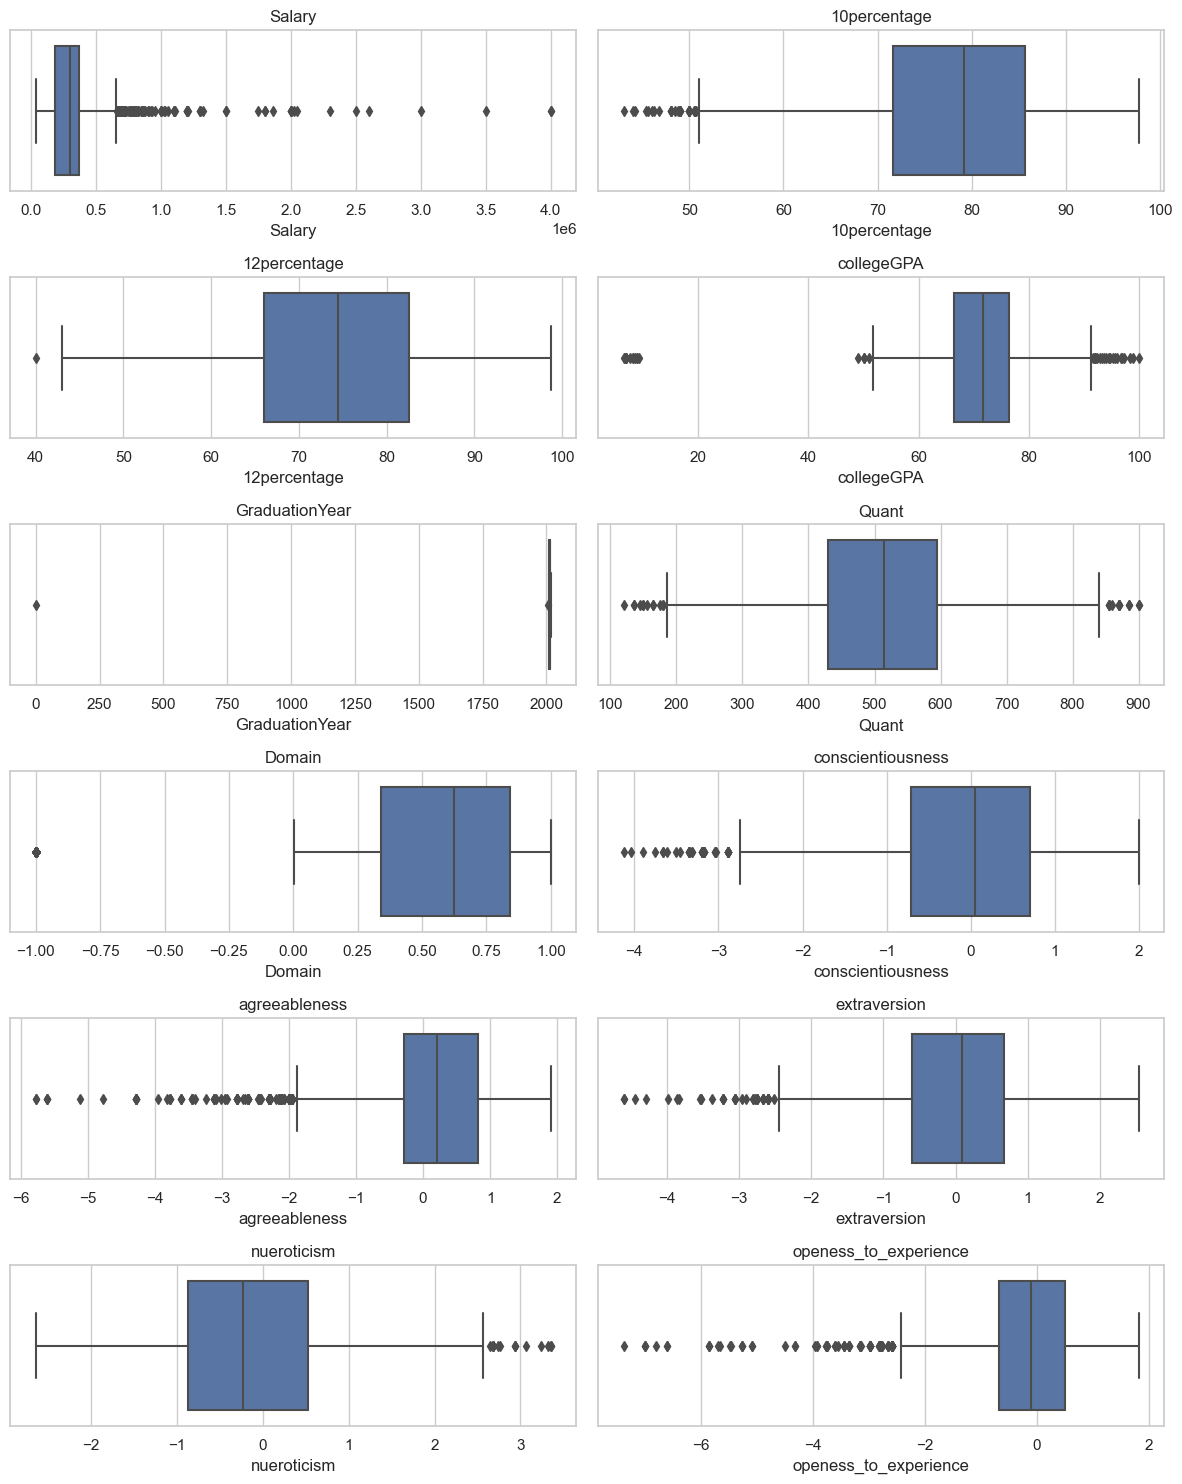

In [273]:
num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'GraduationYear', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,15))
for col, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()

### Observation :

* **"The boxplots show that many numerical columns have a lot of outlier values. Outliers are data points that stick out from the rest, indicating unusual or extreme values. Their presence suggests there might be some uncommon or irregular data in the dataset. This could affect our analysis and modeling, so we need to be mindful of them."**

### Histogram Plot For Numerical Columns

In [274]:
'''
# Plot PDF (Probability Density Function) for Salary
plt.figure(figsize=(5, 6))
plt.hist(df['Salary'], color='blue', bins=30)
plt.title('PDF for Salary')
plt.xlabel('Salary')

# Show the plot
plt.show()
'''

"\n# Plot PDF (Probability Density Function) for Salary\nplt.figure(figsize=(5, 6))\nplt.hist(df['Salary'], color='blue', bins=30)\nplt.title('PDF for Salary')\nplt.xlabel('Salary')\n\n# Show the plot\nplt.show()\n"

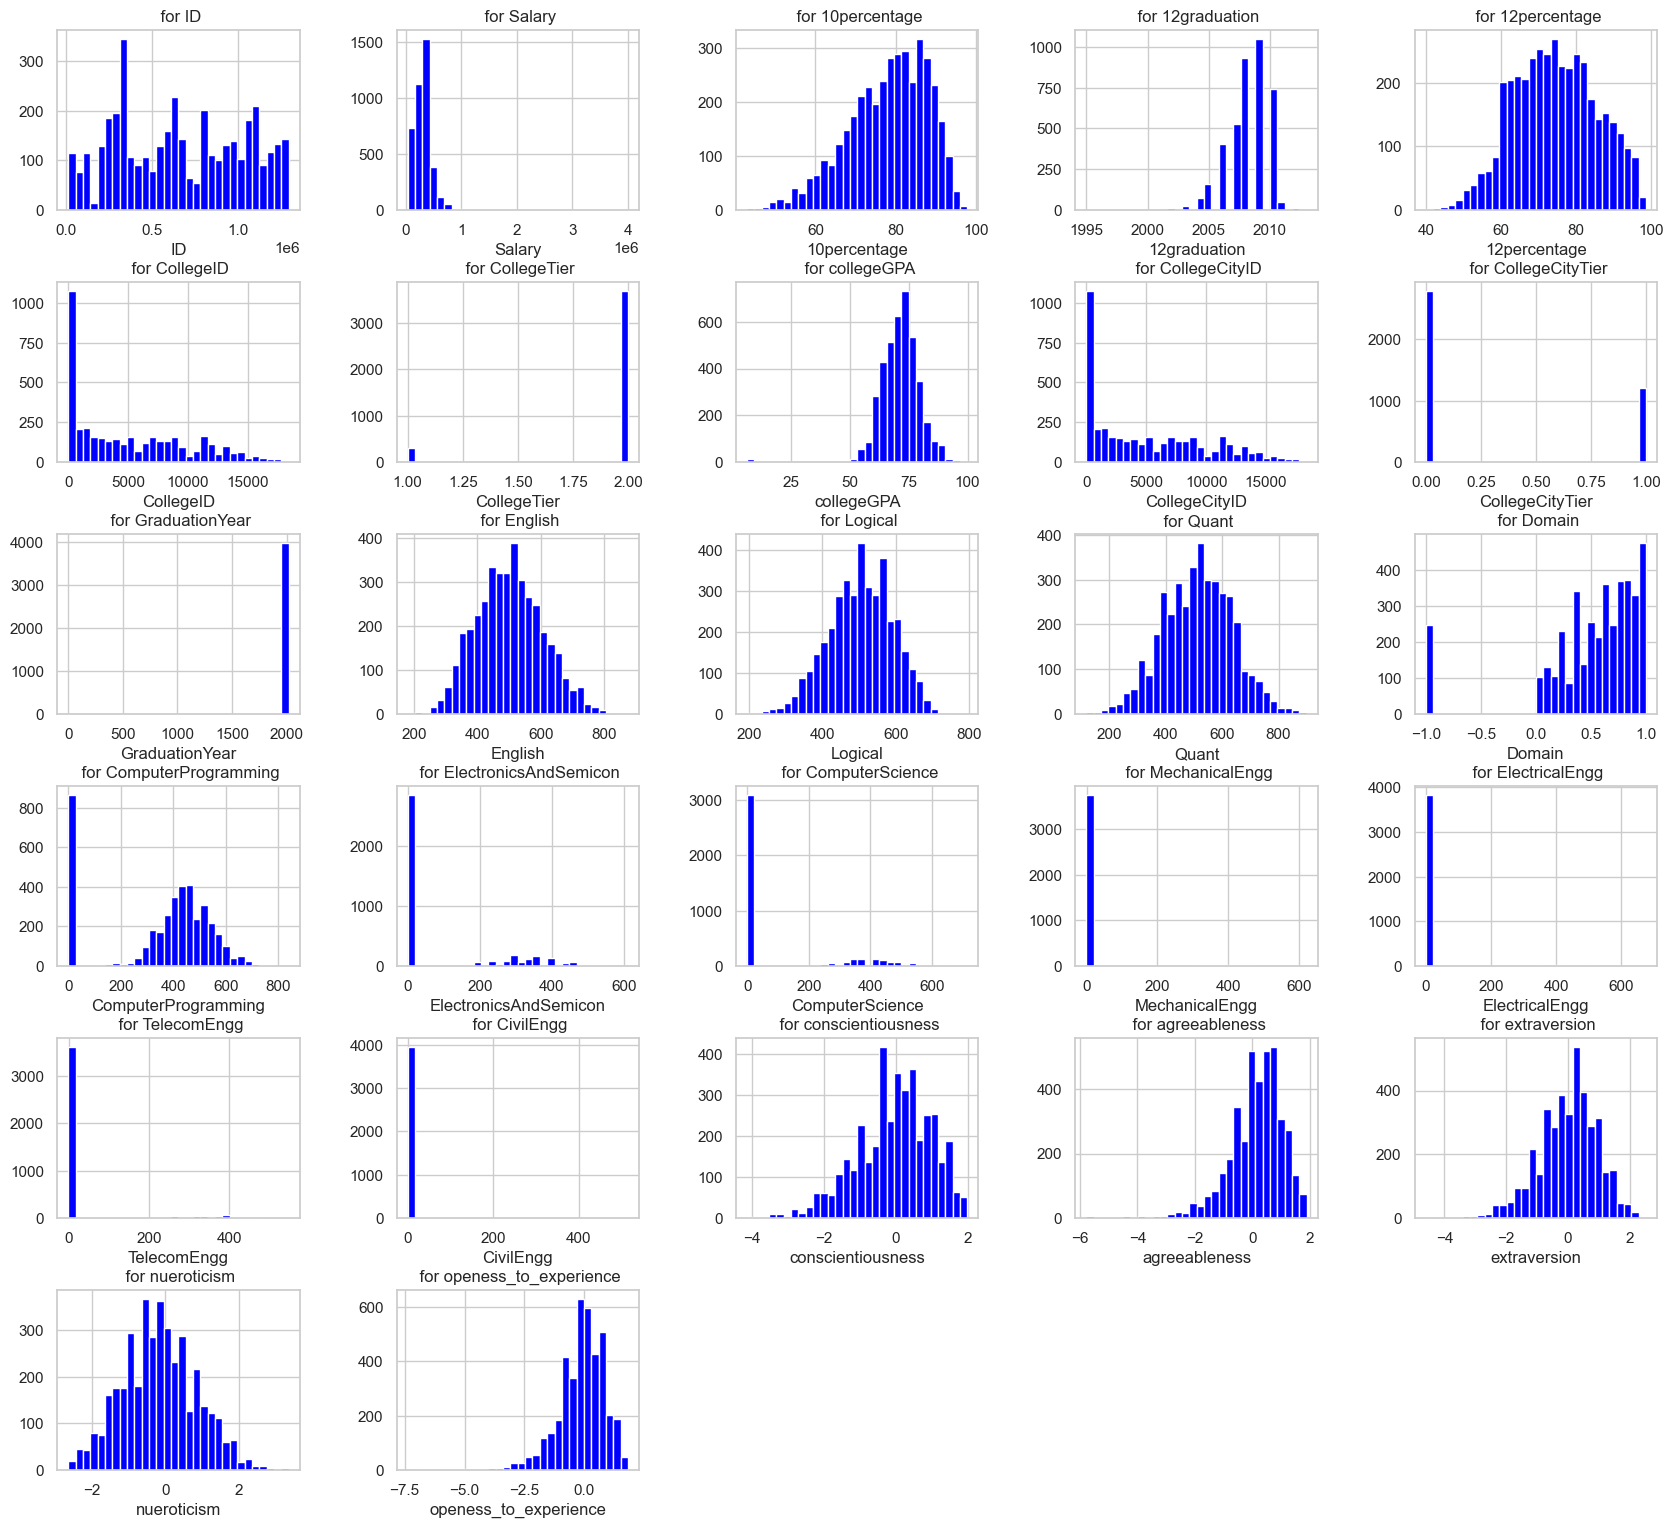

In [275]:
# Plot PDFs, Histograms, Boxplots, and Countplots for numerical variables
plt.figure(figsize=(20,18))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Iterate through each numerical column
for i, column in enumerate(numerical_columns, 1):
    # Plot PDF (Probability Density Function)
    plt.subplot(6, 5, i)
    plt.hist(df[column], color='blue', bins=30)
    plt.title(f' for {column}')
    plt.xlabel(column)

### Observation:
* **- Most numerical columns exhibit a normal distribution, suggesting typical data patterns.**
* **- However, GraduationYear, Domain, agreeableness, and openness_to_experience deviate from this trend.**
* **- These columns display non-normal distributions, indicating potential anomalies or unique characteristics in the data.**

## Bivariate Analysis
### 10percentage Vs Salary

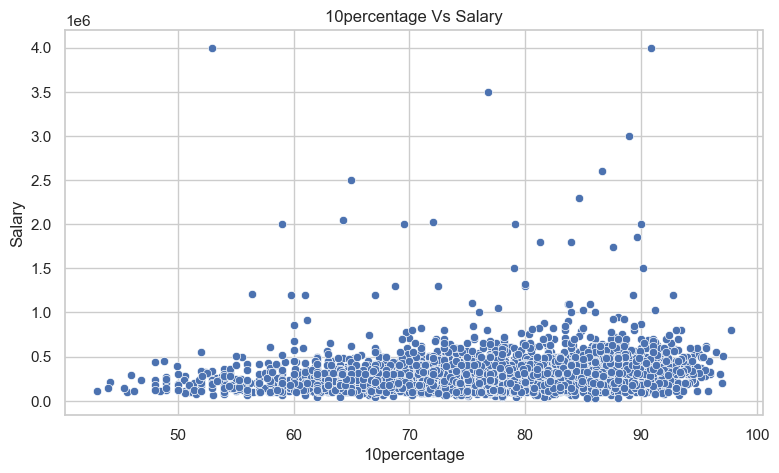

In [276]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='10percentage', y='Salary', data=data)
plt.title('10percentage Vs Salary')
plt.show()

### 12percentage Vs Salary

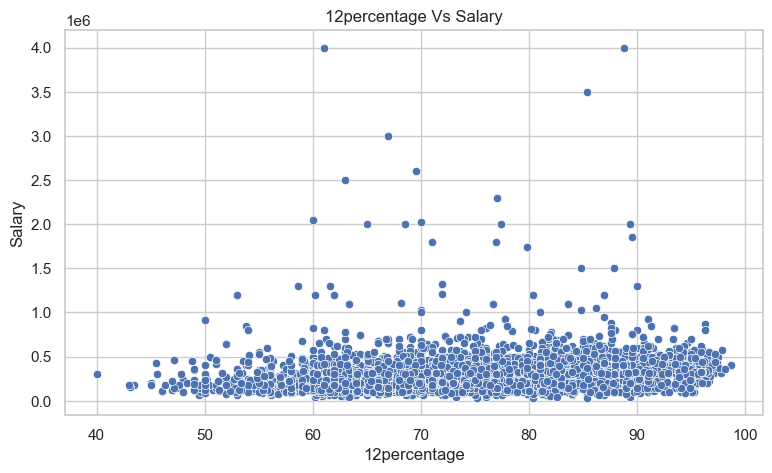

In [277]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='12percentage', y='Salary', data=data)
plt.title('12percentage Vs Salary')
plt.show()

### Experience vs Salary

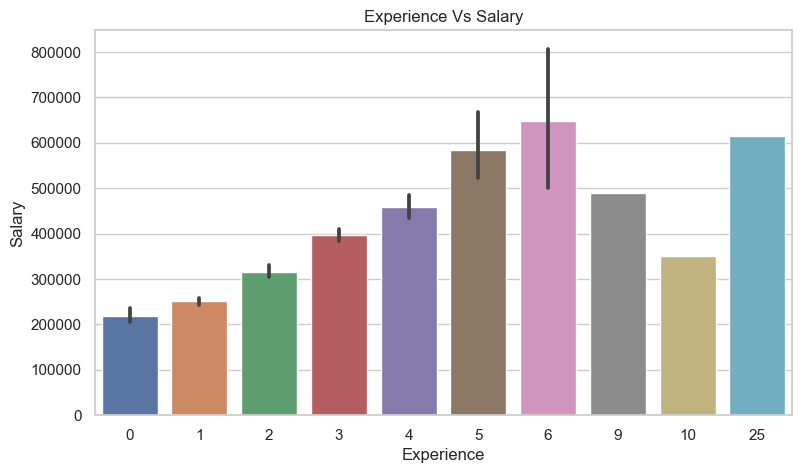

In [278]:
plt.figure(figsize=(9,5))
plt.title('Experience Vs Salary')
sns.barplot(x='Experience',y='Salary',data=data);

### Age Vs Salary

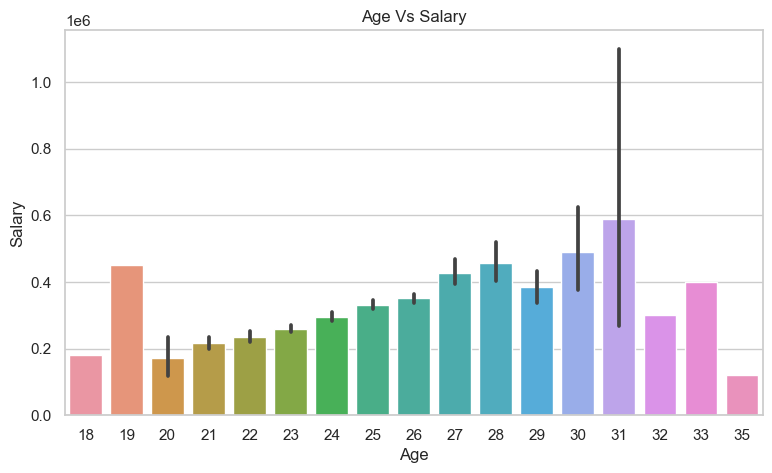

In [279]:
plt.figure(figsize=(9,5))
plt.title('Age Vs Salary')
sns.barplot(x='Age',y='Salary',data=data);

### Observation :
* **31 - 30  age group have highest salaries  with a same percentage with age 19 and 28 **

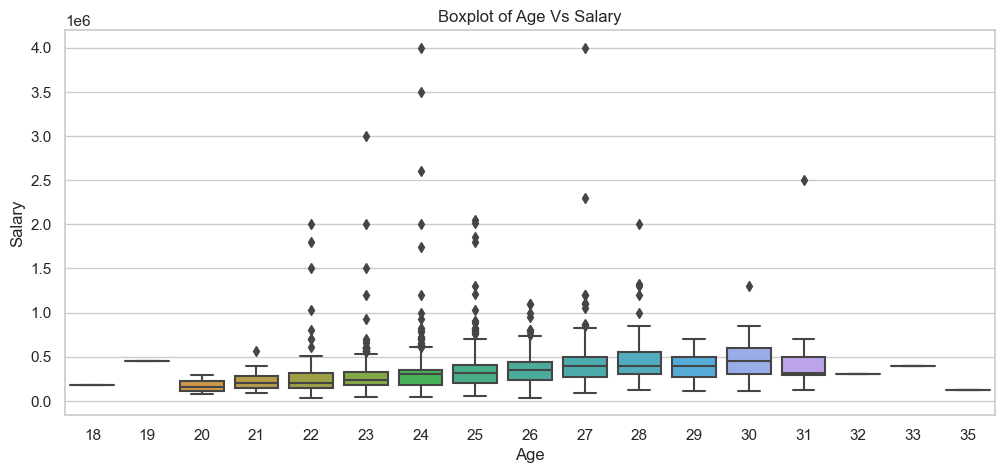

In [280]:
plt.figure(figsize=(12,5))
plt.title('Boxplot of Age Vs Salary')
sns.boxplot(data=data,x='Age', y='Salary');

### Observation :
* **24 and 27 had large number of outlier data which concludes there are high salaries at that age group which are expections**

### Boxplot of salary data

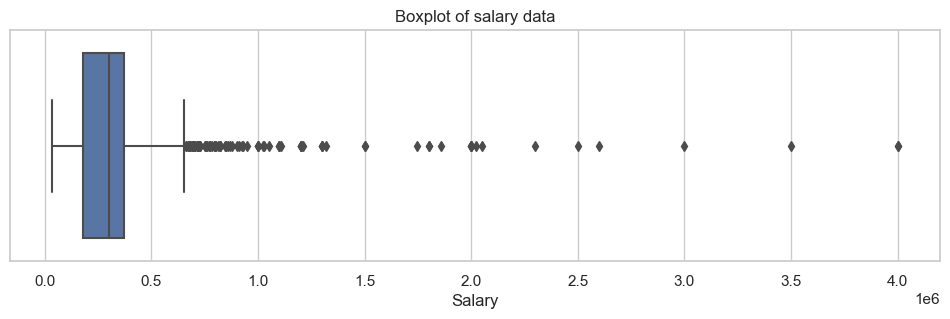

In [281]:
plt.figure(figsize=(12,3))
plt.title('Boxplot of salary data')
sns.boxplot(x = data['Salary']);

### Boxplot visualization of salary and specialization

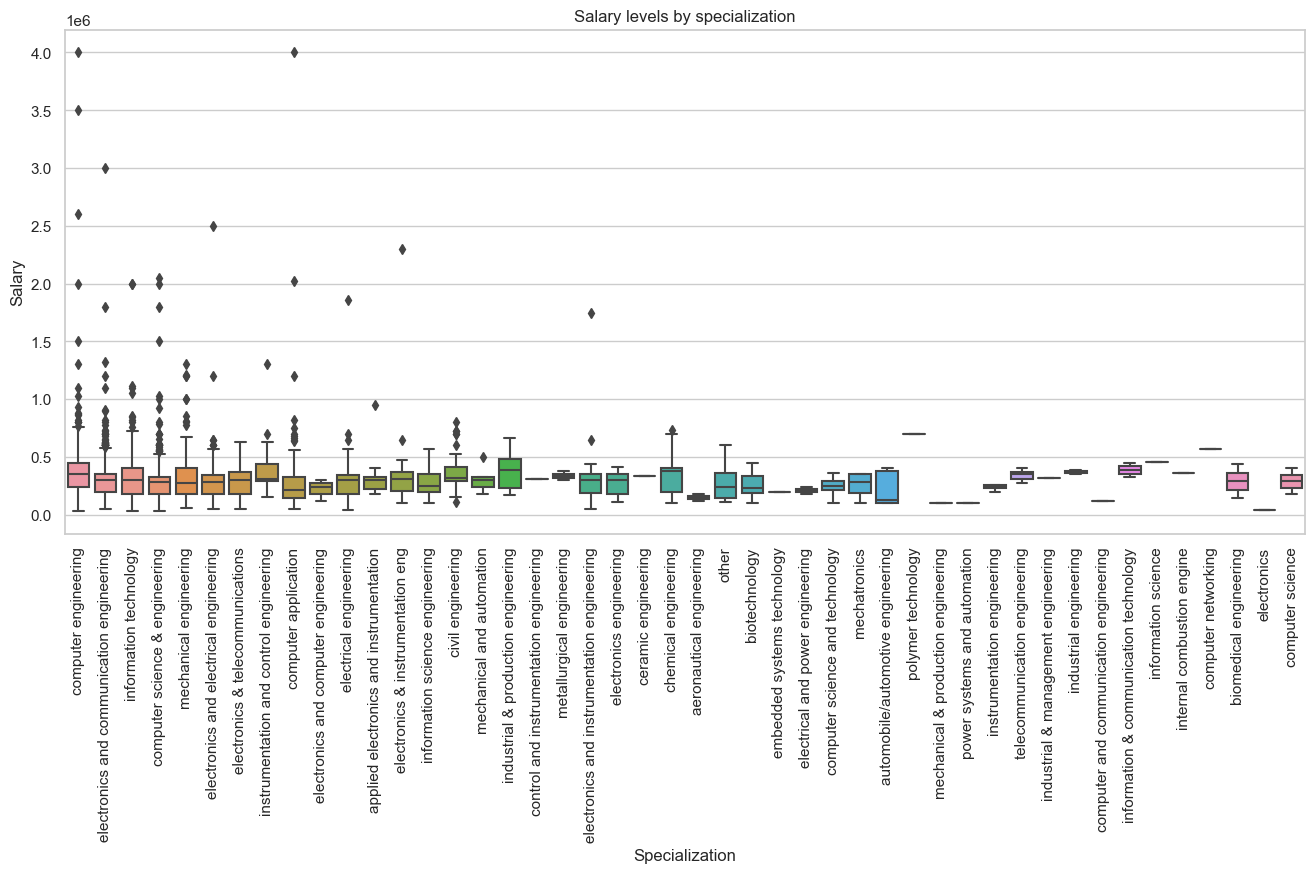

In [282]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=data, x='Specialization', y='Salary')
plt.title('Salary levels by specialization')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.subplots_adjust(top=0.95)
plt.show()

## Observation :
* **If we observe here at each box outliers can be seen for each specialization and considers are highest salary which away from average salary.**
* **It is observed that Computer Science department has many outliers indicating higher salaries are earned by those of Computer Science specializaton**

### Top 20 city names with most of the employees workng

In [283]:
data.JobCity.value_counts()[:20]

JobCity
Bangalore        627
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Lucknow           36
Mysore            36
Navi Mumbai       32
chennai           27
pune              26
Greater Noida     26
Chandigarh        26
Indore            24
Bhubaneswar       22
Coimbatore        20
Name: count, dtype: int64

In [296]:
pip show matplotlib


Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\hp\anaconda\lib\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: gradio, jupyterthemes, seaborn, wordcloud
Note: you may need to restart the kernel to use updated packages.


In [297]:
pip install --upgrade matplotlib


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\hp\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:


In [299]:
import plotly.express as px

# Create a DataFrame with the top 20 city names and their counts
top_cities = data['JobCity'].value_counts()[:20].reset_index()
top_cities.columns = ['City', 'Number of Employees']

# Create a bar plot using Plotly
fig = px.bar(top_cities, x='City', y='Number of Employees', 
             title='Top 20 City Names with Most Employees Working',
             labels={'Number of Employees': 'Number of Employees', 'City': 'City Name'})

# Show the plot
fig.show()


### year wise joining

In [285]:
(data['DOJ'].dt.year).value_counts()

DOJ
2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: count, dtype: int64

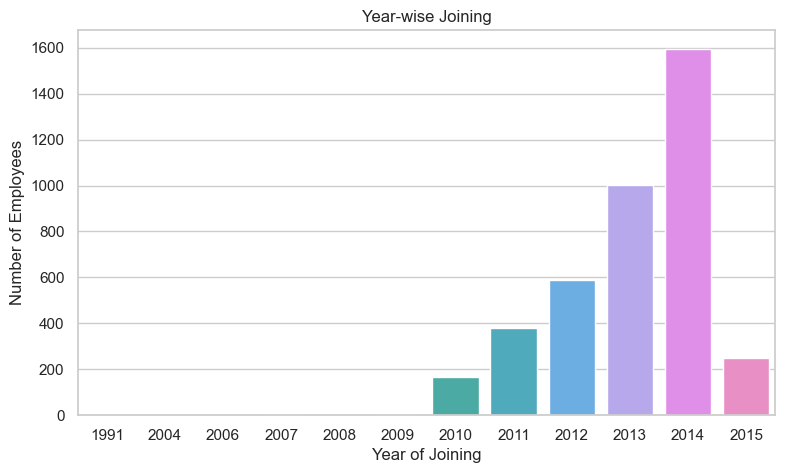

In [301]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(9, 5))

# Count the number of employees joining each year and plot using seaborn
sns.countplot(data=data, x=data['DOJ'].dt.year)

# Set plot title and axis labels
plt.title('Year-wise Joining')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()


### observation 
* **2014 the joining rate is the highest** 

# month wise joining 

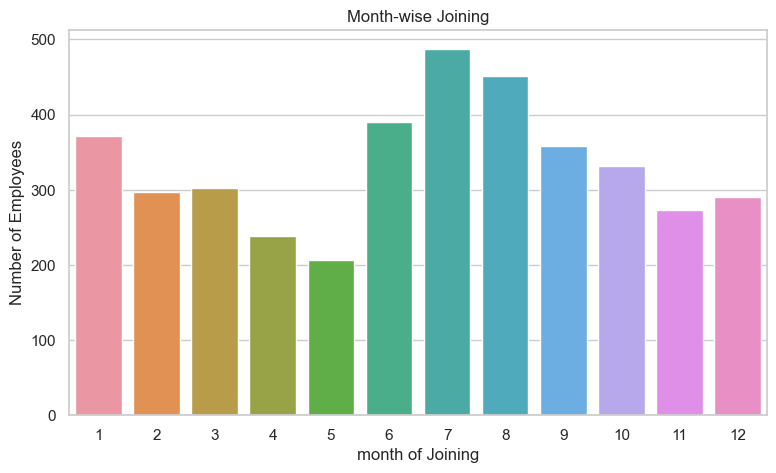

In [302]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(9, 5))

# Count the number of employees joining each year and plot using seaborn
sns.countplot(data=data, x=data['DOJ'].dt.month)

# Set plot title and axis labels
plt.title('Month-wise Joining')
plt.xlabel('month of Joining')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()

# observation
* **In 7th month more number of students had their joining dates**

## GRADUATION YEAR

In [304]:
data['GraduationYear'].value_counts()

GraduationYear
2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64

In [306]:
# Replace 0 values in GraduationYear with 2014
data['GraduationYear'].replace({0: 2014}, inplace=True)

# Verify the unique values in the GraduationYear column
print(data['GraduationYear'].unique())


[2011 2012 2014 2016 2013 2010 2015 2009 2017 2007]


In [308]:
import plotly.express as px

# Create a DataFrame with the count of employee graduation years
graduation_year_counts = data['GraduationYear'].value_counts().reset_index()
graduation_year_counts.columns = ['GraduationYear', 'Count']

# Create a bar plot using Plotly
fig = px.bar(graduation_year_counts, x='GraduationYear', y='Count',
             title="Count of Employee Graduation Year",
             labels={'GraduationYear': 'Graduation Year', 'Count': 'Number of Employees'})

# Show the plot
fig.show()


### Observation :
* **Highest Number of students are completed their Bachelors Degree in year 2013 and least in 2007**

###  Bar graph shows year wise from DOB of people

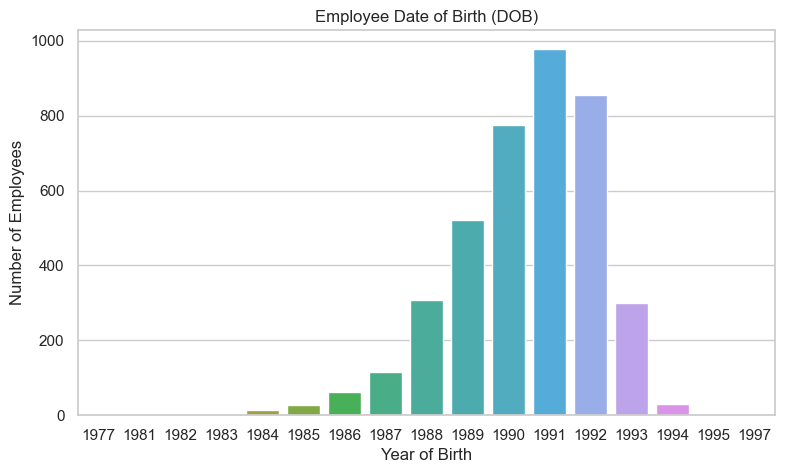

In [312]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(9, 5))

# Count the number of employees born each year and plot using Seaborn
sns.countplot(data=data, x=data['DOB'].dt.year)

# Set plot title and axis labels
plt.title('Employee Date of Birth (DOB)')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()



### Top 20 designation 

In [313]:
data['Designation'].nunique() 

419

In [314]:
data['Designation'].value_counts()[:20]

Designation
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
network engineer               51
data analyst                   49
business analyst               49
engineer                       47
android developer              46
Name: count, dtype: int64

In [316]:
import plotly.express as px

# Get the top 20 designations and their counts
top_designations = data['Designation'].value_counts()[:20].reset_index()
top_designations.columns = ['Designation', 'Count']

# Create a bar plot using Plotly
fig = px.bar(top_designations, x='Designation', y='Count', 
             title="Count of Top 20 Designations",
             labels={'Designation': 'Designation', 'Count': 'Number of Employees'})

# Show the plot
fig.show()




### Employee College States

In [317]:
data['CollegeState'].value_counts()

CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: count, dtype: int64

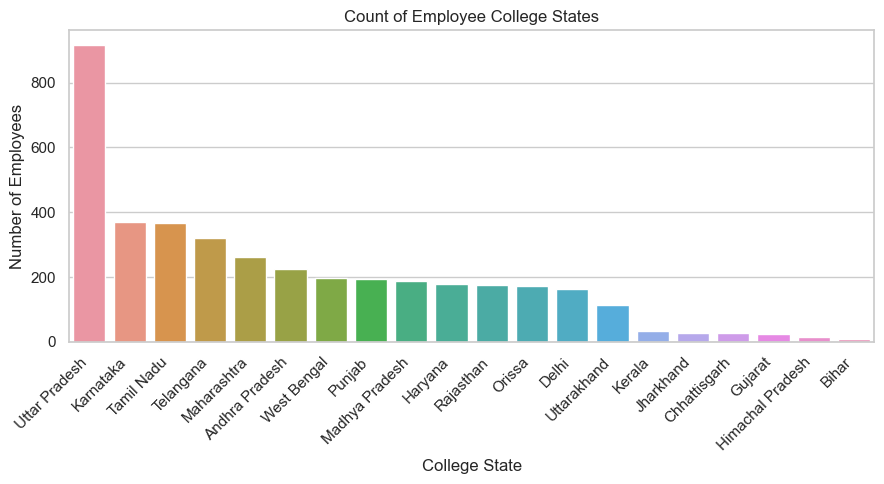

In [318]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(9, 5))

# Get the top 20 college states and their counts
top_college_states = data['CollegeState'].value_counts()[:20]

# Plot the count of employee college states using Seaborn
sns.barplot(x=top_college_states.index, y=top_college_states.values)

# Set plot title and axis labels
plt.title('Count of Employee College States')
plt.xlabel('College State')
plt.ylabel('Number of Employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### observation
* **max number of empployees are from UP followed by karnataka**

In [319]:
data.groupby("JobCity")['Salary'].max()[:20]

JobCity
 Chennai                  335000
 Delhi                    360000
 Mumbai                   180000
 Pune                     180000
 ariyalur                 570000
 bangalore                560000
 mumbai                   265000
A-64,sec-64,noida         120000
AM                        360000
Agra                      200000
Ahmedabad                 715000
Ahmedabad                 330000
Ahmednagar                335000
Al Jubail,Saudi Arabia    360000
Allahabad                 225000
Alwar                     240000
Ambala                    200000
Ambala City               180000
Asansol                   180000
Asifabadbanglore          200000
Name: Salary, dtype: int64

In [320]:
data['Degree'].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

### gender vs salary

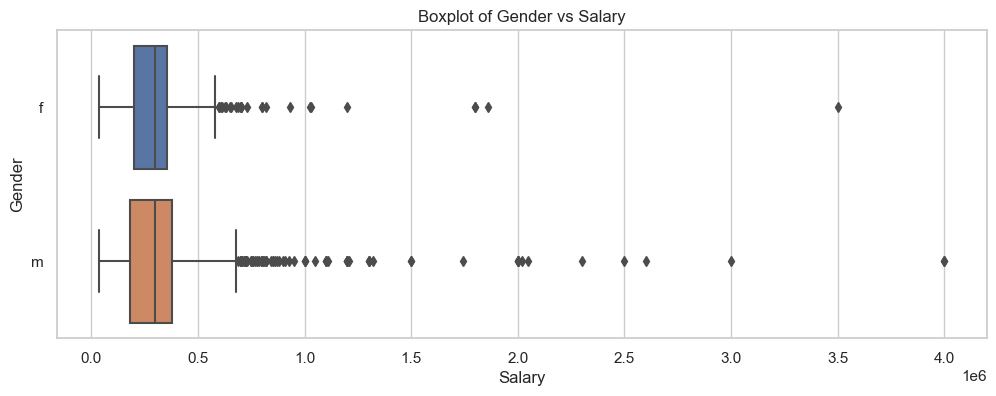

In [321]:
plt.figure(figsize=(12,4))
plt.title("Boxplot of Gender vs Salary")
sns.boxplot(data = data, x = 'Salary', y='Gender' );

### Employee Age


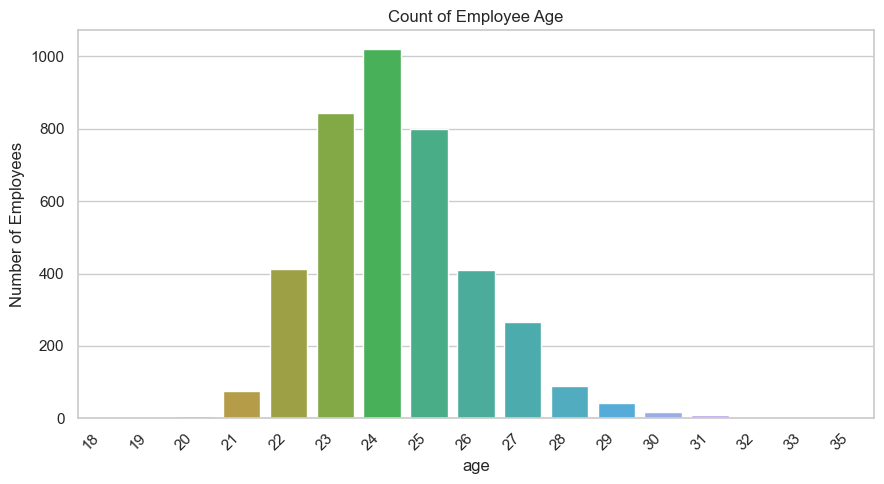

In [322]:
# Set the size of the plot
plt.figure(figsize=(9, 5))

# Get the top 20 college states and their counts
emp_age = data['Age'].value_counts()[:20]

# Plot the count of employee college states using Seaborn
sns.barplot(x=emp_age.index, y=emp_age.values)

# Set plot title and axis labels
plt.title('Count of Employee Age')
plt.xlabel('age')
plt.ylabel('Number of Employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Observation :
* **Large number of employee age groups are 24, 23 and 25**

### Employee Specialization

In [323]:
data['Specialization'].value_counts().head(20)

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

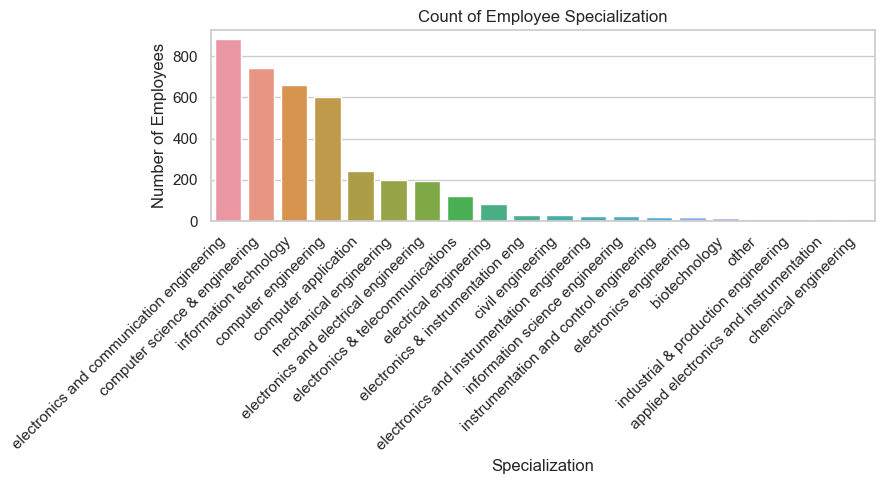

In [325]:
# Set the size of the plot
plt.figure(figsize=(9, 5))

# Get the top 20 college states and their counts
emp_Specialization = data['Specialization'].value_counts()[:20]

# Plot the count of employee college states using Seaborn
sns.barplot(x=emp_Specialization.index, y=emp_Specialization.values)

# Set plot title and axis labels
plt.title('Count of Employee Specialization')
plt.xlabel('Specialization')
plt.ylabel('Number of Employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Observation :
* **countplot shows that most of the students from electronics and communication engineering, computer science & engineering, information technology, computer engineering**

### Specialization vs Salary

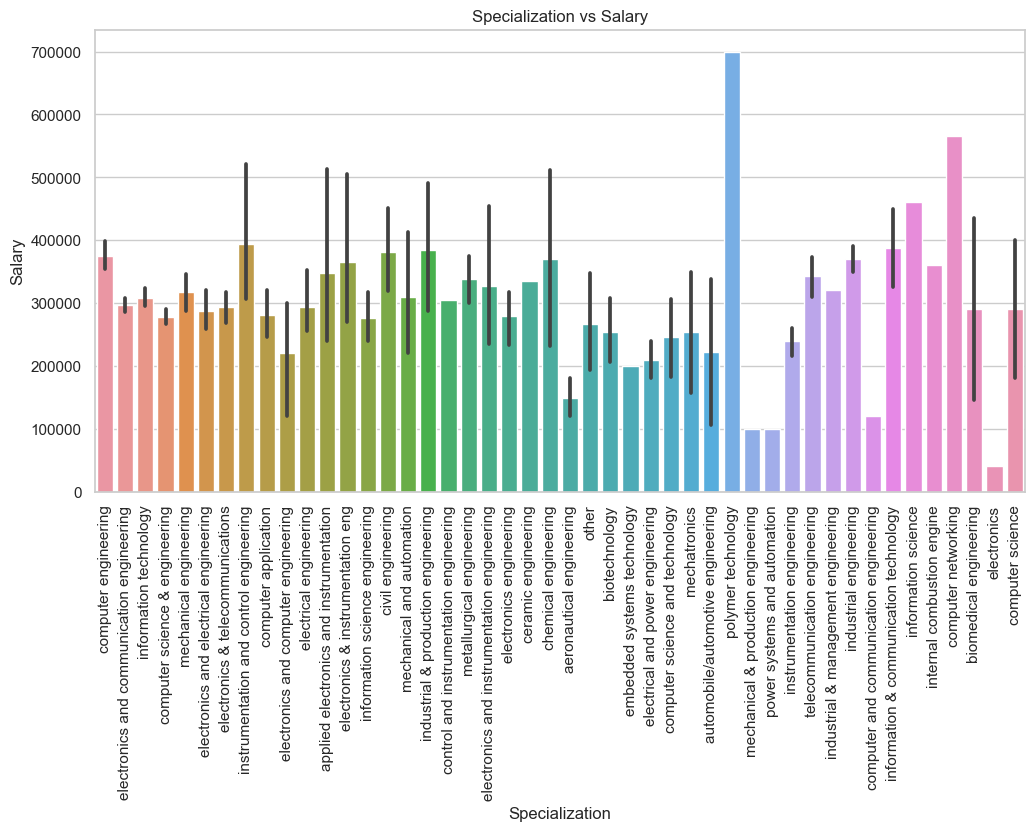

In [326]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Specialization vs Salary")
sns.barplot(data=data, x = 'Specialization', y='Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## 5. Research Question :
* **Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**

## Claiming that
* **Null Hypothesis : H0 : H0 >= 3L**
* **Alternative Hyo : H1 : H1 < 3 L**

### Check the who have the same year of their graduation and job


In [327]:
(data['DOJ'].dt.year == data['GraduationYear']).value_counts()

True     2290
False    1708
Name: count, dtype: int64

In [328]:
data1 = data[(data.Specialization=='computer science & engineering') & (data['DOJ'].dt.year==data['GraduationYear']) & 
             ((data.Designation=='software engineer')  | (data.Designation=='programmer analyst') | 
              (data.Designation=='associate software engineer'))] 
data1

AttributeError: 'Index' object has no attribute '_format_flat'

      Salary        DOJ        DOL         Designation    JobCity Gender  \
24    335000 2014-06-01 2015-06-01  programmer analyst  Hyderabad      m   
31    340000 2014-08-01 2015-04-01   software engineer  Bangalore      m   
48    390000 2013-09-01 2015-12-31   software engineer  Bangalore      m   
55    250000 2014-08-01 2015-12-31   software engineer  Mangalore      m   
115   330000 2013-12-01 2015-04-01   software engineer    Chennai      m   
...      ...        ...        ...                 ...        ...    ...   
3818  240000 2014-02-01 2015-12-31   software engineer     Mumbai      f   
3880  300000 2015-06-01 2015-12-31  programmer analyst    Gurgaon      m   
3881  600000 2014-01-01 2015-12-31   software engineer  Bangalore      m   
3939  100000 2013-07-01 2014-12-01   software engineer  Hyderabad      m   
3989  300000 2014-09-01 2015-12-31   software engineer  Bangalore      m   

            DOB  10percentage                     10board  12graduation  \
24   1993-06

In [329]:
data1[['DOJ','GraduationYear']]

AttributeError: 'Index' object has no attribute '_format_flat'

            DOJ  GraduationYear
24   2014-06-01            2014
31   2014-08-01            2014
48   2013-09-01            2013
55   2014-08-01            2014
115  2013-12-01            2013
...         ...             ...
3818 2014-02-01            2014
3880 2015-06-01            2015
3881 2014-01-01            2014
3939 2013-07-01            2013
3989 2014-09-01            2014

[106 rows x 2 columns]

## Observation :
* **Above all cell is check both graduation year and date of joining in a company should be same which is computer science and engineering who got placed in roles of software engineer, programmer analyst and associate software engineer**

In [330]:
data1['Designation'].unique()

array(['programmer analyst', 'software engineer',
       'associate software engineer'], dtype=object)

In [331]:
data1['Specialization'].value_counts()

Specialization
computer science & engineering    106
Name: count, dtype: int64

In [332]:
data1['Salary']

24      335000
31      340000
48      390000
55      250000
115     330000
         ...  
3818    240000
3880    300000
3881    600000
3939    100000
3989    300000
Name: Salary, Length: 106, dtype: int64

### Salary Description

In [333]:
print('Minimum salary :',data1['Salary'].min())
print('Maximum salary :',data1['Salary'].max())
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Minimum salary : 70000
Maximum salary : 1000000
Average salary : 349198
Median salary  : 320000


### Defining the sample and population parameters

In [334]:
sample_size = 106
sample_mean = 349198
pop_mean = 300000
pop_std = 50000

### z_score for sampling distributions


In [335]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

### Calculating the z-score

In [336]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

10.130488233525568


### One Tail - Calculating the z-critical value 

In [337]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


### Ploting the sampling distribution with rejection regions 

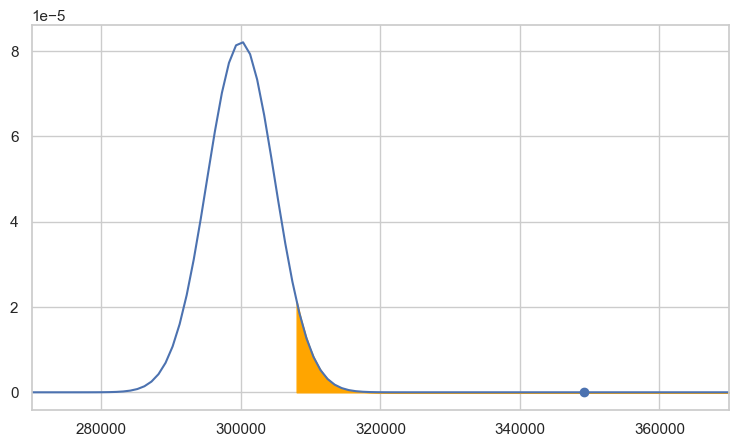

In [339]:
# Defining the x minimum and x maximum
x_min = 270000
x_max = 370000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
plt.figure(figsize=(9,5))
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)

# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Conclusion using z test 

In [340]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


### Conclusion using p test

In [342]:
p_value = 1.0 - norm.cdf(np.abs(z))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


In [343]:
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Average salary : 349198
Median salary  : 320000


## Observation :
* **Here we are getting Reject Null Hypothesis means the salaries for freshers are getting average salaries 3.2L to 3.5L who had joined in computer science engineerning took jobs in softeare enginner, programmer analyst and associate software enginner.**
* **Baesd on the above statistics, this claim by times of India is False.**

## 6. Research Question :
* **Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)**

In [344]:
data['Gender'].unique()

array(['f', 'm'], dtype=object)

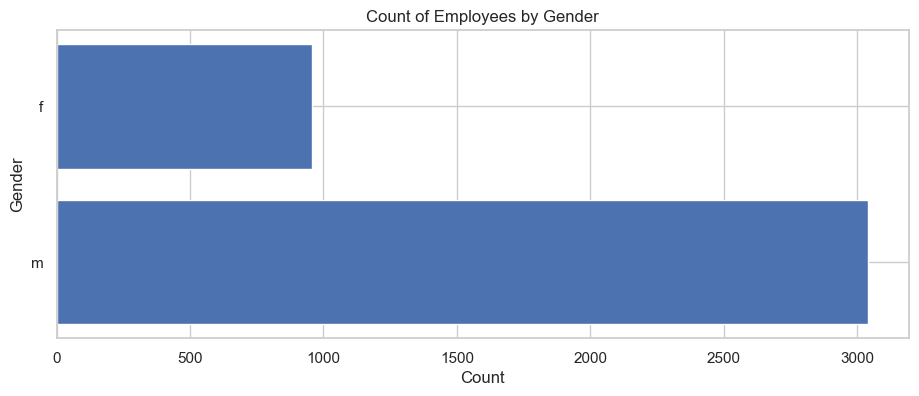

In [350]:
import matplotlib.pyplot as plt

# Count the values of Gender and plot horizontally
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(11, 4))
plt.barh(gender_counts.index, gender_counts.values)

# Set plot title and axis labels
plt.title('Count of Employees by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')

# Set x-axis ticks rotation to 0
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [346]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates   : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio        : {:.2f}'.format(num_males/num_females))

Number of male candidates   : 3041
Number of female candidates : 957
Male to Female ratio        : 3.18


### Boxplot visualization of salary levels by gender

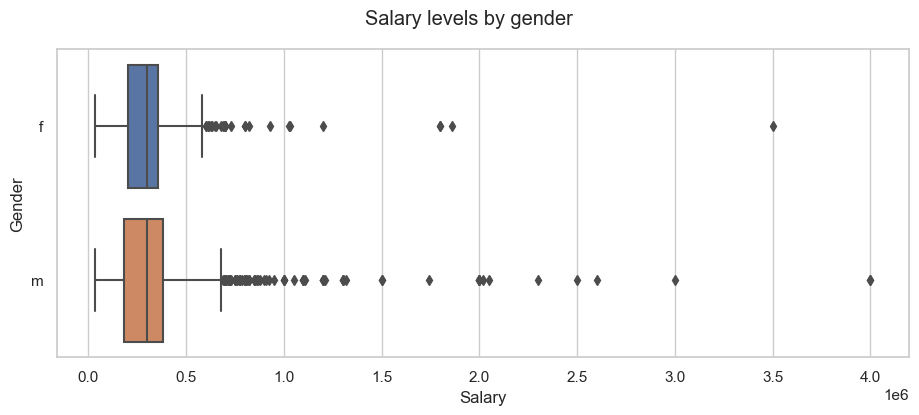

In [347]:
plt.figure(figsize=(11,4))
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')
plt.show()

## Observation :
* **Median salary of males is slightly greater than that of females.**
* **If we observe the outliers in boxplot it clearly shows that male had high range of different salaries.**

### Number of male and female regarding with specialization


In [348]:
data.groupby(data['Gender']).count()['Specialization']

Gender
f     957
m    3041
Name: Specialization, dtype: int64

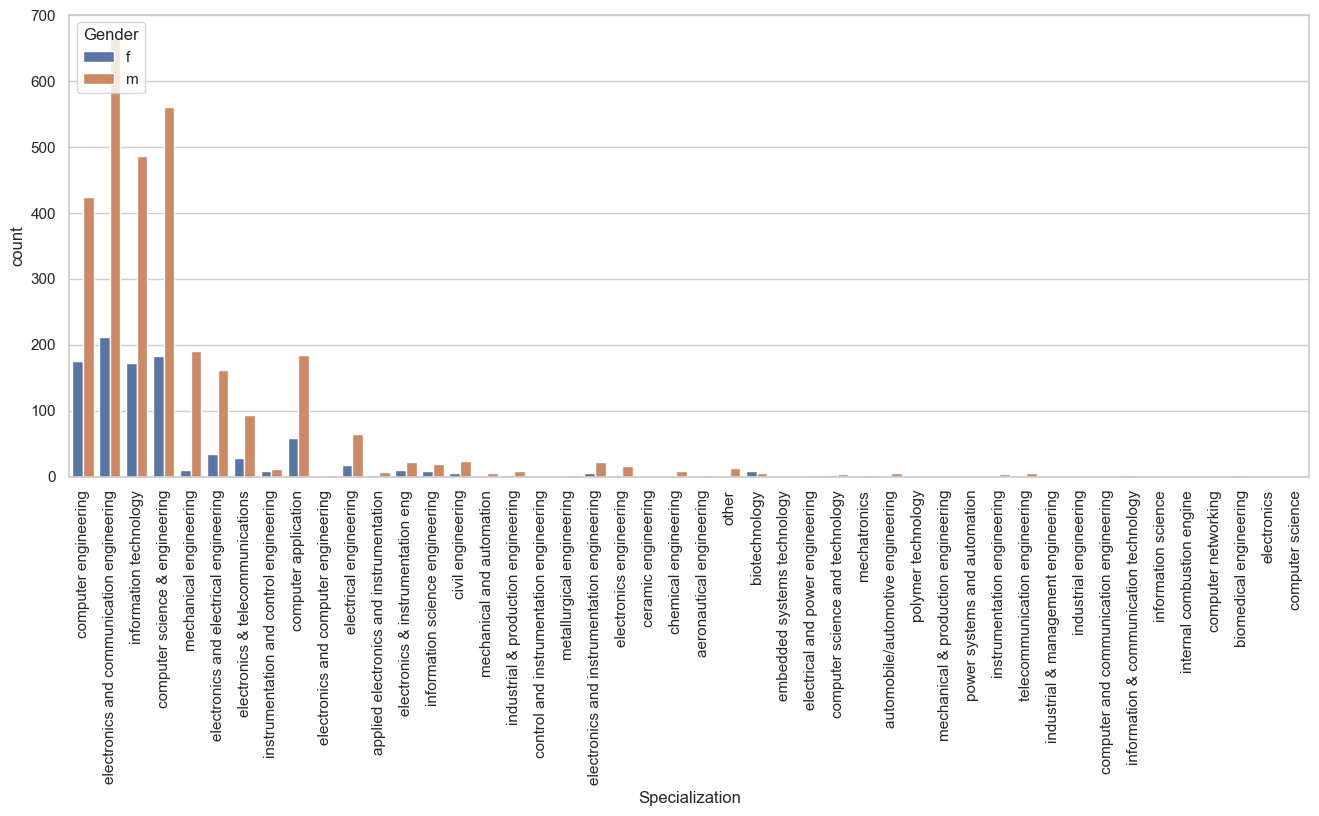

In [349]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='Specialization', hue='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## Observation :
* **We can see male and female ratio with respect to specialization column, number of male ratio is higher in every domain if you observe both male and female are choosing mostely with computer science and electronics groups, because pattern trends tells most of the jobs are available in those feilds.**